# Iniziamo il laboratorio!

E' possibile costruire un sistema in grado di valutare la qualita' delle cure mediche erogate ai singoli pazienti?

Iniziamo il laboratorio che ripercorre quanto realizzato da una societa' americana, la D2hawkeye,specializzata in analisi dati del settore medico. Siamo quindi nell'ambito del sistema sanitario USA basato sull'uso di assicurazioni sanitarie:
il paziente si rivolge ad una struttura sanitaria per effettuare visite mediche, sottoporsi ad esami e terapie, ottenere la prescrizione dei farmaci adatti alla sua patologia; in una fase successiva, la struttura sanitaria si rivolgera' alla compagnia assicurativa del paziente per ottenere il rimborso dei costi sostenuti.

Esaminando i dati relativi a queste richieste di rimborso, e' stato possibile mettere a punto un sistema capace di effettuare un assessment della qualita' del protocollo di cura applicato ai pazienti. 
Con il termine qualita' si intende una valutazione della cura applicata al paziente: gli esami, i farmaci,la cura e' da riternersi appropriata alla patologia del paziente? 

La Sanita' e' un ambito ricco di dati, dati che pero' sono complessi da gestire e per varie ragioni: 

* restrizioni di accesso ai dati legate a normative per la tutela della privacy
* ampia dimensionalita' dei dati: si parla di migliaia di patologie, farmaci e protocolli di cura 
* presenza di dati non strutturati come ad esempio le annotazioni del personale medico 
* mancanza di standard e molteplicita' di piattaforme: strutture sanitarie diverse useranno standard e tecnologie diverse

I dati che esaminiamo appartengono al mondo della sanita' USA.
In particolare il dataset che utilizziamo proviene dalla D2hawkeye, una societa' specializzata nel settore sanitario, che gestisce le richieste di rimborso spese relative a pazienti assicurati, richieste che vengono inoltrate da personale medico o da Strutture Sanitarie per ottenere il pagamento di prestazioni/ricoveri.

Effettuare un assessment sulla qualita' delle prestazioni mediche e del percorso di cura erogato ai pazienti, e' un processo importante per due ragioni:
* la prima perche' consente di migliorare il protocollo di cura e di massimizzare la positiva risoluzione/evoluzione di alcune patologie
* la seconda perche'consente di controllare i costi e di usare al meglio le risorse del sistema sanitario.
Gli assessment di qualita' sono solitamente effettuati da personale medico che, usando le sue competenze, esamina i dati dei pazienti ed emette una sua valutazione. Si tratta di un processo manuale che richiede tempi lunghi e per questa ragione viene effettuato su un campione di pazienti.

Andiamo quindi a mettere a punto un modello che esaminando i dati delle richieste rimborso costi si pone come obiettivo di potere effettuare un assessment su larga scala, esaminando i dati di milioni di pazienti in modo molto efficiente.

Uno degli aspetti che la compagnia D2hawkeye ha dovuto affrontare e' stata la "taggatura" dei dati: le richiesta di rimborso costi sono gia' in forma elettronica ma sono poco accurate. Le richiesta sono compilate da personale medico e contengono informazioni come 
* codice della diagnosi 
* codice della prestazione
* costo della prestazione

L'operazione di taggatura consiste nell'esaminare il record di ogni singolo paziente e associare a questo una valutazione della qualita' alta o bassa, dove con qualita' si intende il grado di appropriatezza della cura applicata al paziente. 

Il dataset che andiamo ad esaminare rappresenta un campione di 131 pazienti diabetici, di eta' compresa tra 35 e 55 anni e con un costo sanitario compreso tra 10000$ e 20000$. Il file contiene dati relativi al periodo 2003-2005 e comprende il campo di taggatura che contiene un valore booleano per rappresentare una scarsa qualita' della cura: TRUE nel caso di scarsa qualita' e FALSE nel caso di buona qualita' della cura.


Vediamo da vicino cosa e' il **Machine Learning** con questo semplice esercizio.
Per fare questo scriveremo un programma. 
Il codice che scriveremo, pero', non avra' lo scopo di definire in forma di **source code** le regole in base alle quali rispondere a degli input. 

Al contrario il codice che scriveremo avra' lo scopo di imparare dai dati, rappresentazione di un'esperienza passata, come  rispondere agli input futuri. Il nostro codice sara' focalizzato sugli aspetti di lettura dati, sulla comprensione di quali parametri siano rilevanti per il problema e di quale sia il modello matematico migliore per effettuare apprendimento o meglio il training del programma.
nel file di dati dovremo identificare:
* una variabile del dataset che viene considerata dipendente, o target ,e sara' proprio questa variabile che il modello dovra'   
  predire
* un set di variabili indipendenti che saranno usate per determinare il valore della variabile dipendente 

Il notebook che andiamo a scrivere vuole mettere a punto un modello in grado di valutare la qualita' di un trattamento sanitario.


Il nostro dataset di training si chiama quality.csv ed e' stato messo a punto dal MIT Professor Dimitris Bertsimas questa e' una reference alla pubblicazione:
https://dl.acm.org/citation.cfm?id=1528038. 

Porta il file quality.csv su object storage parendo la sezione dati: puoi fare drag and drop oppure fai upload con browse. Troverai il file quality.csv anche nella sezione data asset.

* Posizionati con il cursore nella cella sottostante

* Apri il menu a fianco del file e scegli Insert to code e poi Insert R DataFrame.

Verranno generate in automatico le chiamate REST per agganciare Cloud Object Storage con le tue credenziali.

Viene poi preparata la  call per la lettura del file.

* Dove compare **df.data.1** edita un nome piu' parlante per il dataset.

* Cambia  df.data.1 con quality:
   ** quality <- read.csv(text = rawToChar(obj$content))**
   
   ** head(quality) **

* Con **CTLR-ENTER** esegui il codice contenuto nella cella.

* Con **head(quality)** puoi vedere le prime righe del dataset e la riga di intestazione.





In [1]:
# The code was removed by for sharing
library("aws.s3")

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
Sys.setenv("AWS_ACCESS_KEY_ID" = "207461e07f4b40a2999f8c4619398b9b", "AWS_SECRET_ACCESS_KEY" = "f3e5792fb4fe1e271026eccc34ac2e259b89a1b699d45d5b")
url <- "s3-api.us-geo.objectstorage.service.networklayer.com"
bucket <- "salutequalita-donotdelete-pr-sjyntyezpejtcb"
headers <- list(`x-amz-content-sha256`="e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855")

obj <- s3HTTP(
    verb = "GET",
    bucket = bucket,
    headers = headers,
    path = "quality.csv",
    key = Sys.getenv("AWS_ACCESS_KEY_ID"),
    secret = Sys.getenv("AWS_SECRET_ACCESS_KEY"),
    check_region = FALSE,
    base_url = url)

quality <- read.csv(text = rawToChar(obj$content))
head(quality)


MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
1,0,0,18,1,731,10,18,21,93,222,FALSE,0,0
2,1,1,6,1,411,0,8,27,19,115,FALSE,1,0
3,0,0,5,3,731,10,5,16,27,148,FALSE,5,0
4,0,1,19,0,158,34,20,14,59,242,FALSE,0,0
5,8,2,19,3,449,10,29,24,51,204,FALSE,0,0
6,2,0,9,2,731,6,11,40,53,156,FALSE,4,1


*****************************************************************************************************************************
In un progetto di DataScience la parte piu' importante e anche piu' impegnativa e' rappresentata dalla esplorazione dei dati attraverso lo studio dei dataset e di conseguenza della loro cleaning o pulizia.

Usando il linguaggio R ci sono molti comandi che ci aiutano a esplorare e conoscere il nostro dataset.

Con **str(quality)** possiamo vedere quante righe sono presenti nel file, quante variabili abbiamo, il loro nome e il loro tipo


In [3]:
str(quality)

'data.frame':	131 obs. of  14 variables:
 $ MemberID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ InpatientDays       : int  0 1 0 0 8 2 16 2 2 4 ...
 $ ERVisits            : int  0 1 0 1 2 0 1 0 1 2 ...
 $ OfficeVisits        : int  18 6 5 19 19 9 8 8 4 0 ...
 $ Narcotics           : int  1 1 3 0 3 2 1 0 3 2 ...
 $ DaysSinceLastERVisit: num  731 411 731 158 449 ...
 $ Pain                : int  10 0 10 34 10 6 4 5 5 2 ...
 $ TotalVisits         : int  18 8 5 20 29 11 25 10 7 6 ...
 $ ProviderCount       : int  21 27 16 14 24 40 19 11 28 21 ...
 $ MedicalClaims       : int  93 19 27 59 51 53 40 28 20 17 ...
 $ ClaimLines          : int  222 115 148 242 204 156 261 87 98 66 ...
 $ StartedOnCombination: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ AcuteDrugGapSmall   : int  0 1 5 0 0 4 0 0 0 0 ...
 $ PoorCare            : int  0 0 0 0 0 1 0 0 1 0 ...


Il nostro dataset rappresenta i record di 131 pazienti diabetici scelti a caso da una popolazione di diabetici con eta' compresa tra 35 e 55 anni, con costi sanitari associati compresi tra 10000 e  20000 dollari e relativa ad un intervallo temporale 2003-2005.
Ogni riga del dataset e' relativa ad un paziente.
Queste sono le variabili e il loro significato:

* MemberID codice identificativo del paziente da 1 a 131.
* InpatientDays e' il numero di visite di controllo o il numero di giorni di ricovero ospedaliero.
* ERVisits numero di visite effettuate presso il pronto soccorso.
* OfficeVisits numero di visite presso ambulatorio medico.
* Narcotics numero di prescrizioni di analgesici.
* DaysSinceLastERVisit numero di giorni tra l'ultima visita al Pronto Soccorso e la conclusione dell'indagine medica. 
* Pain numero di visite in cui il paziente lamenta per il suo disturbo.
* TotalVisits totale visite effettuate presso strutture sanitarie.
* ProviderCount numero di strutture che ha seguito il paziente.
* MedicalClaims numero di giorni relativo alla richiesta di rimborso spese.
* ClaimLines is the total number of medical claims.
* StartedOnCombination variabile binaria (TRUE o FALSE) per rappresentare se e' gia' stato iniziato un trattamento farmacologico 
  per il diabete.
* AcuteDrugGapSmall la percentuale di farmaci, per la fase acuta, che sono stati prescritti una seconda volta in uno stretto  
  intervallo temporale.
* PoorCare e' la variabile dipendente che vogliamo predire e rappresenta la qualita' del trattamento erogato al paziente. Questa 
  variabile assume il valore 1 nel caso di scarsa qualita', assume il valore 0 nel caso di buona qualita'.



Il modello che andiamo a costruire dovra' effettuare una classificazione dei record paziente cioe' dovra' associare ad ogni record un valore discreto in questo caso VERO o FALSO riferito alla scarsa qualita' della cura a cui e' stato sottoposto il paziente specifico.
Per costruire il modello usiamo una **Regressione Logistica** che ritorna le probabilita' associate ai valori della variabile indipendente PoorCare.

PoorCare e' la nostra y, il target che vogliamo predire, ed assume i valori y=1 per rappresentare una scarsa qualita' e y=0 per rappresentare un'alta qualita'.
Ragionando in termini di probabilita' avremo che : P(y=0)= 1-P(y=1)

La Regressione Logistica riesce a collegare variabili che hanno una relazione non lineare. 
Ad esempio nel caso dei nostri dati, proviamo a fare un plot della feature OfficeVisits, cioe' il numero di visite in ambulatorio, versus 
Narcotics, cioe' antidolorifici, e mettiamo anche in evidenza PoorCare in rosso 


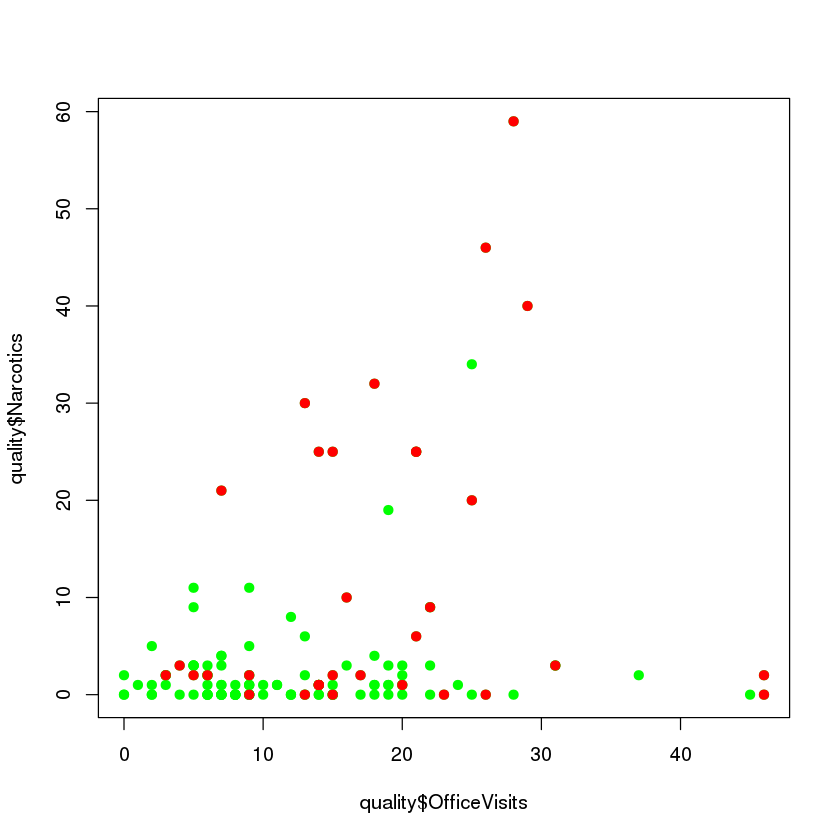

In [4]:
plot(quality$OfficeVisits,quality$Narcotics,col="green",pch=19 )
points(quality$OfficeVisits[quality$PoorCare==1], quality$Narcotics[quality$PoorCare==1],col="red",pch=19)

E' difficile trovare una relazione tra il numero di visite in ambulatorio e le prescrizioni di antidolorifici.
Quello che pero'si intravvede e' che un numero maggiore di prescrizioni di anestetici e un numero alto di visite in ambulatorio, si associano ad una piu bassa qualita' della cura del paziente.


La rappresentazione matematica della Regressione Logistica e' la seguente:
<img src="https://user-images.githubusercontent.com/17910093/43718952-995b443e-998c-11e8-93fa-982f27b36323.png"  style="width: 500px"/>
Esaminando la funzione si puo' vedere che:
* per un esponente >>0 la probabilita' tende a 1
* per un esponente <<0 la probabilita' tende a 0.

Per costruire il modello faremo il training della Regressione Logistica utilizando i dati del nostro file, e in questo modo andiamo a determinare i valori dei pesi (β0,β1,...,βn) della funzione.

Nel caso della Regressione Logistica dobbiamo procedere in modo iterativo facendo convergere la funzione verso la soluzione ottimale.

Nel nostro caso avremo che:
valori alti di (β0,β1,...,βn) corrisponderanno ad una bassa qualita'
valori bassi di (β0,β1,...,βn) corrisponderanno ad un'alta qualita'

Andiamo a suddividere il dataset in una componente di training e in una componente di test.
Avremo in particolare il 75% dei dati usati per il training e il restante 25% per il test

In [5]:
library(caTools)
set.seed(88)
spl=sample.split(quality$PoorCare,SplitRatio=0.75)

In [18]:
#Andiamo a vedere lo split
spl

[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25] FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
 [37] FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
 [49] FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
[109]  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[121] FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE

In [6]:
#creiamo i due dataset di training e di test

qualitytrain=subset(quality,spl==TRUE)
qualityTest=subset(quality,spl==FALSE)

Andiamo a determinare la previsione di base, cioe' la regola del pollice.
Trattandosi di una classificazione, la domanda che ci poniamo e': "la qualita' di un percorso di  cura e' da considerarsi non soddisfacente oppure buono? 
Possiamo verificare quale delle due situazioni si verifica piu' frequentemente e decidere che questa e' la nostra predizione di default.

In [7]:
table(qualitytrain$PoorCare)


 0  1 
74 25 

Guardando il risultato, fortunatamente ci sono molti piu casi di buona qualita' della cura applicata al paziente, piu' precisamente 74, rispetto ai casi di scarsa qualita' della cura, piu' precisamente 25. 
La baseline di riferimento per il nostro modello sara' prevedere che un caso e' un caso di buona sanita'.
Dovremo quindi andare a migliorare la baseline che possiede un'accuratezza del 75%.

Costruiamo il modello di Regressione Logistica per verificare quanto rappresentato nel grafico. 
Usiamo la funzione **glm** che sta per **generalized logistic regression** 
Specificando il parametro **family = binomial** 
diciamo a glm di produrre una Classificazione.

In [8]:
qualityMdl=glm(PoorCare~ OfficeVisits+Narcotics, data=qualitytrain, family=binomial)

In [9]:
#verifichiamo la bonta' del modello ottenuto
summary(qualityMdl)


Call:
glm(formula = PoorCare ~ OfficeVisits + Narcotics, family = binomial, 
    data = qualitytrain)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.06303  -0.63155  -0.50503  -0.09689   2.16686  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.64613    0.52357  -5.054 4.33e-07 ***
OfficeVisits  0.08212    0.03055   2.688  0.00718 ** 
Narcotics     0.07630    0.03205   2.381  0.01728 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 111.888  on 98  degrees of freedom
Residual deviance:  89.127  on 96  degrees of freedom
AIC: 95.127

Number of Fisher Scoring iterations: 4


*****************************************************************************************************************************
Esaminiamo il risultato del modello.

* Per prima cosa vediamo la funzione che abbiamo utilizzato per creare il modello: PoorCare in funzione di OfficeVisits e Narcotics

  Nella riga sottostante abbiamo la distribuzione dei Residuals, cioe' le differenze tra punti stimati e punti reali.

* Di seguito abbiamo i coefficenti relativi alle variabili che abbiamo usato nel modello.

* La colonna **ESTIMATE** rappresenta i valori dei coefficienti :

* **Intercept** corrisponde a **β0**, mentre **OfficeVisits** corrisponde a **β1** e **Narcotics** corrisponde a **β2**


Da summary si puo' vedere che entrambe le variabili sono significative per il modello.
Il linguaggio R ci proppone in modo immediato questa valutazione usando gli asterischi a fianco del coefficiente. 

Si puo' vedere inoltre che i valori dei parametri sono entrambi positivi e questo corrisponde ad avere delle probabilita' di PoorCare, cioe' scarsa qualita', che tendono ad 1 al crescere dei valori delle variabili.
Questo conferma quanto potevamo dedurre dal plot disegnato sopra che mostrava un maggiore numero di casi di trattamento sanitario non adeguato in corrispondeza di un maggiore numero di visite e di prescrizioni di analgesici.



Andiamo a testare il modello sui dati di test e confrontiamo il valore di PoorCare predetto da quello reale contenuto nel dataset.
Specifichiamo il parametro type="response" con cui diciamo al modello di tornare delle probabilita'.


In [10]:
predictTrain=predict(qualityMdl,type="response")
#andiamo a vedere il risultato
summary(predictTrain)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06623 0.11910 0.15970 0.25250 0.26760 0.98460 

I valori ottenuto eseguendo il modello sul dataset di test sono valori compresi tra 0 e 1. Questo e' corretto perche' avevamo richiesto delle probabilita'.
In realta', pero', vorremmo ottenere una risposta di tipo binario: 
il paziente e' stato sottoposto ad una cura di scarsa qualita' o di buona qualita'?
Dobbiamo quindi convertire le probabilita' in un valore binario indicativo di scarsa/buona qualita'.

Per fare questo dobbiamo lavorare introducendo una soglia **t**:
se la probabilita' P(PoorCare=1)>= t allora decidiamo che PoorCare=1 cioe' scarsa qualita'
se la probabilita' P(PoorCare=1)< t allora decidiamo che PoorCare=0 cioe' buona qualita'



Come determinare il valore di soglia?
Per determinare quale valore di soglia selezionare occorre valutare quale tipo di errori possiamo e vogliamo accettare.
Ovviamente possiamo pensare che non fare errori sia la cosa migliore ma nella realta' non fare errori e' impossibile.
Quindi dobbiamo decidere se:
* fare piu' errori stimando come buona qualita' quella che nella realta' si e' dimostrata una scarsa qualita'
In questo caso siamo sicuri di identificare solo i pazienti con i casi peggiori in fatto assistenza sanitaria
* fare piu' errori stimando come scarsa qualita' anche quella che in realta' e' stata una buona pratica
in questo caso siamo sicuri di raccogliere tutti i pazienti che hanno ricevuto un percorso di cura non corretto

Ricordiamo che stiamo applicando un valore di soglia a delle probabilita'.
Se scelgo un valore t=0.5 non specifico alcuna preferenza sul tipo di errore.

Quindi il trade-off che decide come trasformare la pura probabilita' in una categoria deve essere deciso dall'uomo, dal medico che possiede la giusta expertise.

Quali sono i costi che vogliamo sostenere:
** il costo di non rilevare dei positivi?
oppure
** il costo di sollevare dei falsi allarmi?


Per rappresentare in modo quantitativo gli errori sui dati posso utilizzare la **matrice di confusione**


In [11]:
table(qualitytrain$PoorCare,predictTrain>0.5)

   
    FALSE TRUE
  0    70    4
  1    15   10

Le righe rappresentano i valori reali associati all'indicatore PoorCare (ricordiamo 0 = buona qualita' e 1 = scarsa qualita').
Le colonne rappresentano i valori predetti dal modello.
Gli elementi diagonali sono quelli che abbiamo predetto correttamente.
Questo consente di valutare l'**Accuratezza** del modello come **(TN+TP)/totale dati** ovvero
**TN= True Negative** i veri negativi
**TP= True Positive** i veri positivi

In particolare mettiamo in evidenza
quanto abbiamo predetto come **True Positive** in rapporto al totale reale dei positivi **TP/(TP+FN)** 
dove **FN= False Negative**
quanto abbiamo predetto come **True Negative** in rapporto al totale reale dei negativi **TN/(TN+FP)** 
dove **FP= False Positive**

Il primo valore si chiama **Sensitivita'**, il secondo valore e' la **Specificita'**.
E' chiaro che se ho una Sensitivita' alta aumento la probabilita' di classificare come positivi dei falsi positivi.
Se invece aumento la Specificita' aumento la probabilita' di classificare come negativi dei falsi negativi.

La soglia quindi mi trasforma il risultato espresso intermini probabilistici in un risultato finale dove abbiamo operato una decisione in termini di classificazione. Questo potrebbe fare interpretare il risultato in modo erroneo come un **risultato falsamente deterministico**. Nella realta' abbiamo deciso che eventi con una probabilita' sopra una certa soglia, decidiamo di interpretarli in un certo modo, almeno fino ad evidenza del contrario.
Cambiare la soglia, che trasforma la probabilita' in un risultato, significa modificare le corrispondenti sensitivita' e specificita'. 

Proviamo cambiando la soglia. 
Prova a costruire la matrice di classificazione per t=0.7 e poi per t=0.2


In [12]:
##inserisci qui il codice
table(qualitytrain$PoorCare,predictTrain>0.7)


   
    FALSE TRUE
  0    73    1
  1    17    8

In [33]:
#calcola la sensitivita' e la specificita'
#inserisci qui la sensitivita'
#inserisci qui la specificita'

[1] 0.32

In [ ]:
#Esegui lo stesso calcolo per t=0.2

#inserisci qui il codice

In [ ]:
#Valuta la corrispondente sensitivita' e specificita' 

Come scegliere quindi?
Andiamo a valutare la curva **ROC Receiver Operator Characteristic curve** 

Con la curva ROC possiamo visualizzare andamento del rate di Veri Positivi, cioe' la Sensitivita', versus il rate di Falsi Positivi al variare della soglia di classificazione.
Potremo avere un'immagine visuale del tradeoff tra sensitivita' e specificita' e quindi scegliere la soglia piu' adatta ai nostri obiettivi. 

Considerando i valori estremi per la soglia:
se scelgo una soglia = 1, in questo caso non avro' positivi, quindi una sensitivita'= 0 ma anche il rate dei Falsi Positivi sara' =0. 
Sono quindi sono nel punto (0,0)
se scelgo una soglia = 0, in questo caso avro' tutti positivi, quindi una Sensitivita'= 1 e anche il rate dei Falsi Positivi =1. 
Quindi in questo caso sono nel punto (1,1).

Scegliero' il valore della soglia di classificazione in base a quali sono i costi che posso accettare per il mio modello:
* il costo di fallire nel classificare correttamente un positivo
* il costo di produrre dei falsi allarmi.

Scegliero' quindi un valore di soglia: 
- molto basso per avere il massimo dei Falsi Positivi, se voglio essere certo di non mancare alcuno dei positivi.
- intermedio in modo da avere il massimo rate dei veri positivi in corrispondenza di un basso rate dei falsi positivi, se la mia preoccupazione
  e' avere un'alta Sensitivita'.

L'andamento dei rate di Veri Positivi e Falsi Positivi con la soglia sara' migliore se il mio modello di classificazione e' stato bravo a separare le due classi di dati. In questo caso il valora dell'area sotto la curva ROC sara' prossimo ad 1.


In [13]:
install.packages("ROCR")
library(ROCR)


Installing package into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/s134-d3732d870007a8-30ea0668a339/R/libs’
(as ‘lib’ is unspecified)
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



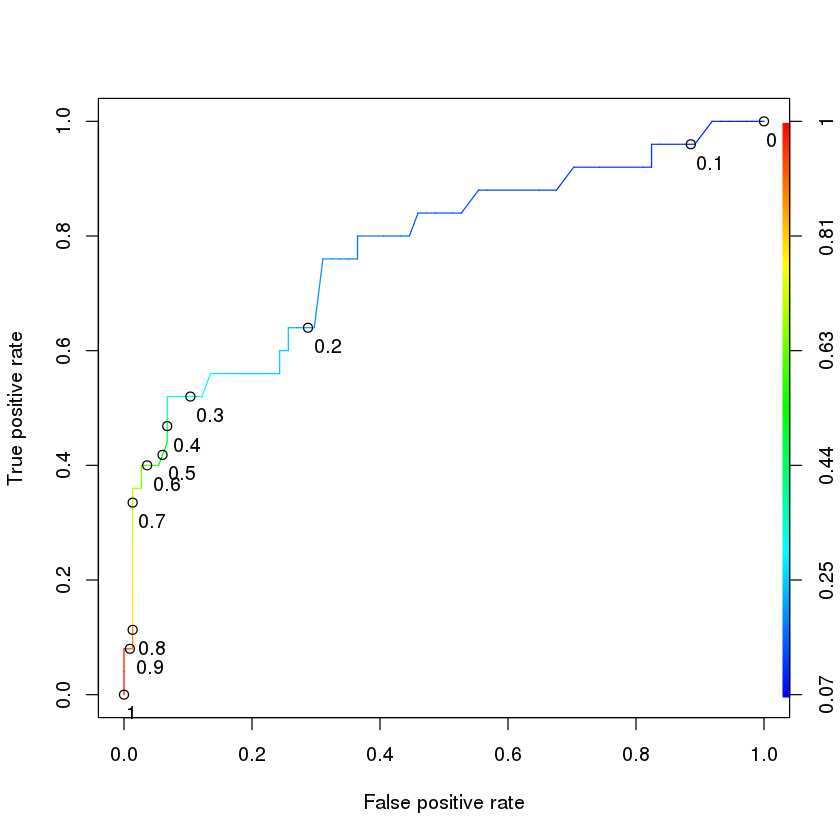

In [14]:
ROCRpred=prediction(predictTrain,qualitytrain$PoorCare)
ROCRperf=performance(ROCRpred,"tpr","fpr")
plot(ROCRperf,colorize=TRUE,print.cutoffs.at= seq(0,1,0.1),text.adj= c(-0.2,1.7))

Questa rappresentazione mostra l'andamento dei veri positivi e dei falsi positivi al variare della soglia t.
I valori della soglia sono rappresentati con i colori e a destra compare la legenda.
Nel punto (0,0), il valore di t=1 che corrisponde a non avere True positive e quindi la sensitivita' =0.
Nel punto (1,1) il valore di t=0 e corrisponde ad avere tutti True positive e quindi sensitivita' =1.
Il valore della soglia varia quindi da 1 in corrispondenza del punto (0,0) e decresce avvicinandosi al punto (1,1).
Il valore di t viene riportato sulla curva ROC.

Sceglieremo t in modo da avere il massimo dei true positive in corrispondenza di un basso valore di falsi positivi.
Ad esempio nel punto (0,0.4) abbiamo un valore di t=0.6 e stiamo classificando correttamente il 40% dei casi di bassa qualita' mentre abbiamo un valore molto basso di falso positivi.
Nel punto (0.6,0.9) classifico correttamente il 90% dei positivi ma ho anche un rate di falsi positivi di 60%.
proviamo a scegliere t=0.3 e andiamo a testare il modello sui dati di test.


In [15]:
predictTest=predict(qualityMdl,type="response",newdata=qualityTest)


Andiamo a vedere nel file di test quale accuratezza si ottiene usando la predizione di tipo baseline, cioe' che  l'outcome e' quello di caso di buona qualita0 delle cure che sono state effettuate sul paziente.
Questo valore sara la nostra predizione di base.


In [44]:
table(qualityTest$PoorCare)


 0  1 
24  8 

In [45]:
#accuratezza di predire una buona qualita' e' pari a
24/(24+8)

[1] 0.75

Andiamo a valutare l'accuratezza ottenuta usando il modello

In [48]:
table(qualityTest$PoorCare,predictTest>=0.3)

   
    FALSE TRUE
  0    19    5
  1     2    6

In [49]:
(19+6)/nrow(qualityTest)

[1] 0.78125

Rispetto alla baseline, abbiamo quindi migliorato accuratezza del modello di 3 punti percentuali. 
Potrebbe sembrare un valore basso ma considerate che, secondo International Diabetes Federation, nel 2035 sono previsti nel mondo 595 milioni di persone diabetiche.
Migliorare del 3% il tipo di trattamento per il paziente cronico diabetico, significa riuscire a trattare correttamente un numero pari a 17.85 milioni di pazienti diabetici che in caso contrario sarebbero oggetto di percorsi di cura non ottimali e costituirebbero un costo per i sistemi sanitari.